In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib import style
dataGold = pd.read_csv('gold.csv', parse_dates=['Date'], index_col='Date')

In [65]:
print(dataGold.columns)

Index(['Gold'], dtype='object')


In [66]:
dataUSD = pd.read_csv('euro-dollar.csv',parse_dates=['Date'], index_col='Date')
dataSil = pd.read_csv('silverNew.csv',parse_dates=['Date'], index_col='Date')

In [67]:
print(dataUSD.columns)

Index(['EU-USD'], dtype='object')


In [68]:
dataDJIA = pd.read_csv('DJIA.csv',parse_dates=['Date'], index_col='Date')
dataGas = pd.read_csv('Gas.csv',parse_dates=['Date'], index_col='Date')

In [69]:
print(dataGas.columns)

Index(['RegAll', 'RegConvention'], dtype='object')


In [70]:
merge = pd.merge(dataGold,dataUSD,on = 'Date',how = 'outer')
merge = pd.merge(merge, dataDJIA,on = 'Date', how = 'outer')
merge = pd.merge(merge, dataGas,on = 'Date', how = 'outer')
merge = pd.merge(merge, dataSil,on = 'Date', how = 'outer')

In [71]:
merge

,Gold,EU-USD,DJIAOpen,DJIAHigh,DJIALow,DJIAClose,RegAll,RegConvention,silPrice
Date,,,,,,,,,
2020-03-27,1621.20,1.1167,21898.47,22327.57,21469.27,21636.78,NaN,NaN,14.583
2020-03-26,1620.10,1.1039,21468.38,22595.06,21427.10,22552.17,NaN,NaN,14.685
2020-03-25,1620.95,1.0880,21050.34,22019.93,20538.34,21200.55,NaN,NaN,14.855
2020-03-24,1599.50,1.0810,19722.19,20737.70,19649.25,20704.91,NaN,NaN,14.263
2020-03-23,1494.50,1.0744,19028.36,19121.01,18213.65,18591.93,2.12,2.007,13.312
...,...,...,...,...,...,...,...,...,...
2020-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.365
2020-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.341
2020-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.328


In [72]:
merge.sort_values(by=['Date'],axis=0,ascending=True,inplace=True)

In [73]:
NaNEU = merge[merge['EU-USD'].isna()]
NaNDJIA = merge[merge['DJIAHigh'].isna()]
NaNReg = merge[merge['RegAll'].isna()]
discard = pd.merge(NaNEU,NaNDJIA,on = 'Date',how = 'inner')
discard = pd.merge(NaNReg,discard,on = 'Date',how = 'inner')
len(discard)

6677

In [74]:
merge.drop(discard.index, inplace=True)

In [75]:
merge[['RegAll', 'RegConvention']] = merge[['RegAll', 'RegConvention']].fillna(method='ffill')
merge[['RegAll', 'RegConvention']] = merge[['RegAll', 'RegConvention']].fillna(method='bfill')
merge[['Gold']] = merge[['Gold']].interpolate(method = 'time')
merge[['Gold']] = merge[['Gold']].fillna(method = 'bfill')
merge[['EU-USD']] = merge[['EU-USD']].interpolate(method = 'time')
merge[['EU-USD']] = merge[['EU-USD']].fillna(method = 'bfill')
merge[['DJIAOpen']] = merge[['DJIAOpen']].interpolate(method = 'time')
merge[['DJIAHigh']] = merge[['DJIAHigh']].interpolate(method = 'time')
merge[['DJIALow']] = merge[['DJIALow']].interpolate(method = 'time')
merge[['DJIAClose']] = merge[['DJIAClose']].interpolate(method = 'time')
merge[['DJIAOpen', 'DJIAHigh', 'DJIALow', 'DJIAClose']] = merge[['DJIAOpen', 'DJIAHigh', 'DJIALow', 'DJIAClose']].fillna(method = 'bfill')
merge[['silPrice']] = merge[['silPrice']].interpolate(method = 'time')
merge[['silPrice']] = merge[['silPrice']].fillna(method='bfill')

In [76]:
merge

,Gold,EU-USD,DJIAOpen,DJIAHigh,DJIALow,DJIAClose,RegAll,RegConvention,silPrice
Date,,,,,,,,,
1990-08-16,399.25,1.1825,2681.44,2746.53,2676.23,2681.44,1.191,1.191,5.168
1990-08-17,410.50,1.1825,2644.80,2679.21,2598.02,2644.80,1.191,1.191,5.179
1990-08-20,410.90,1.1825,2656.44,2679.21,2632.42,2656.44,1.191,1.191,5.129
1990-08-21,407.85,1.1825,2603.96,2645.54,2566.09,2603.96,1.191,1.191,5.091
1990-08-22,410.00,1.1825,2560.15,2630.69,2553.21,2560.15,1.191,1.191,5.129
...,...,...,...,...,...,...,...,...,...
2020-03-31,1621.20,1.1027,21678.22,22378.09,21522.08,22327.48,2.005,1.886,14.191
2020-04-01,1621.20,1.0954,21678.22,22378.09,21522.08,22327.48,2.005,1.886,14.024
2020-04-02,1621.20,1.0852,21678.22,22378.09,21522.08,22327.48,2.005,1.886,14.686


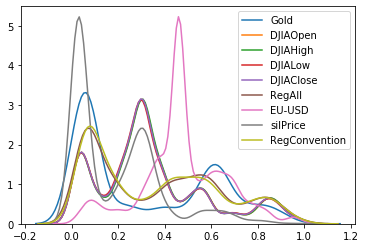

,Gold,EU-USD,DJIAOpen,DJIAHigh,DJIALow,DJIAClose,RegAll,RegConvention,silPrice
Gold,1.000000,0.406173,0.720984,0.719358,0.722704,0.721244,0.839343,0.830712,0.931766
EU-USD,0.406173,1.000000,-0.021233,-0.022845,-0.019054,-0.020931,0.584472,0.597900,0.506634
DJIAOpen,0.720984,-0.021233,1.000000,0.999902,0.999873,0.999827,0.596212,0.577199,0.547505
DJIAHigh,0.719358,-0.022845,0.999902,1.000000,0.999783,0.999888,0.595579,0.576561,0.545940
DJIALow,0.722704,-0.019054,0.999873,0.999783,1.000000,0.999893,0.597092,0.578089,0.549296
DJIAClose,0.721244,-0.020931,0.999827,0.999888,0.999893,1.000000,0.596269,0.577251,0.547750
RegAll,0.839343,0.584472,0.596212,0.595579,0.597092,0.596269,1.000000,0.999533,0.870800
RegConvention,0.830712,0.597900,0.577199,0.576561,0.578089,0.577251,0.999533,1.000000,0.868682
silPrice,0.931766,0.506634,0.547505,0.545940,0.549296,0.547750,0.870800,0.868682,1.000000


In [56]:
import seaborn as sns
scaler = preprocessing.MinMaxScaler()
scaled_Data = scaler.fit_transform(merge)
scaled_Data = pd.DataFrame(scaled_Data, columns = ['Gold','EU-USD','DJIAOpen', 'DJIAHigh', 'DJIALow', 'DJIAClose','RegAll','RegConvention','silPrice'])
sns.kdeplot(scaled_Data['Gold'])
sns.kdeplot(scaled_Data['DJIAOpen'])
sns.kdeplot(scaled_Data['DJIAHigh'])
sns.kdeplot(scaled_Data['DJIALow'])
sns.kdeplot(scaled_Data['DJIAClose'])
sns.kdeplot(scaled_Data['RegAll'])
sns.kdeplot(scaled_Data['EU-USD'])
sns.kdeplot(scaled_Data['silPrice'])
sns.kdeplot(scaled_Data['RegConvention'])
plt.show()
scaled_Data
scaled_Data.corr(method = 'pearson')

In [57]:
scaled_Data

,Gold,EU-USD,DJIAOpen,DJIAHigh,DJIALow,DJIAClose,RegAll,RegConvention,silPrice
0,0.089042,0.460184,0.011684,0.012080,0.012265,0.011636,0.088556,0.096560,0.036827
1,0.095887,0.460184,0.010330,0.009600,0.009375,0.010288,0.088556,0.096560,0.037071
2,0.096130,0.460184,0.010760,0.009600,0.010646,0.010716,0.088556,0.096560,0.035961
3,0.094275,0.460184,0.008822,0.008360,0.008195,0.008786,0.088556,0.096560,0.035118
4,0.095583,0.460184,0.007204,0.007813,0.007720,0.007175,0.088556,0.096560,0.035961
...,...,...,...,...,...,...,...,...,...
7763,0.832502,0.356856,0.713310,0.735157,0.708649,0.734280,0.342376,0.315873,0.237000
7764,0.832502,0.347404,0.713310,0.735157,0.708649,0.734280,0.342376,0.315873,0.233295
7765,0.832502,0.334197,0.713310,0.735157,0.708649,0.734280,0.342376,0.315873,0.247981
7766,0.832502,0.327334,0.713310,0.735157,0.708649,0.734280,0.342376,0.315873,0.244365


In [58]:
categorical = [var for var in scaled_Data.columns if scaled_Data[var].dtype == 'O']


discrete = [ var for var in scaled_Data.columns if var not in categorical
            and len(scaled_Data[var].unique())<10 
           ]

continuous = [var for var in scaled_Data.columns if var not in categorical and var not in discrete]
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(categorical)} categorical variables')

There are 9 continuous variables
There are 0 discrete variables
There are 0 categorical variables


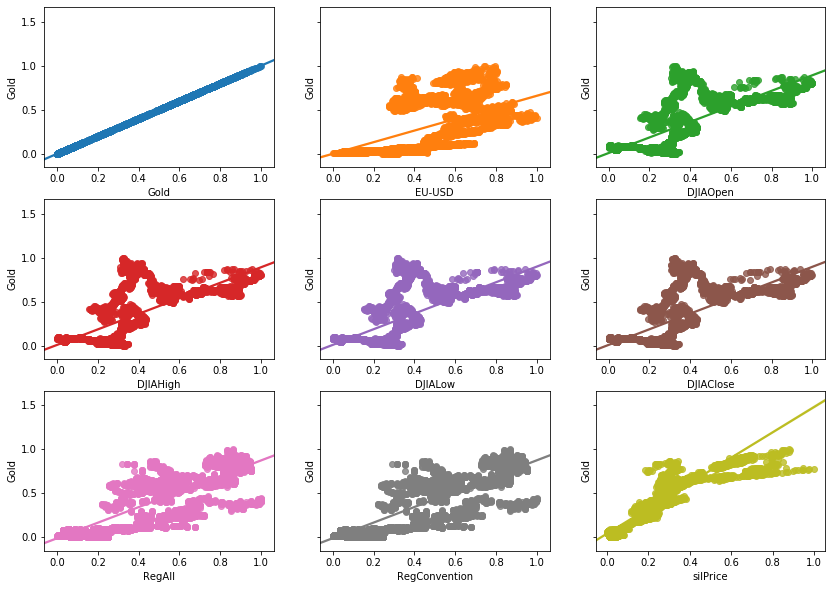

In [61]:
fig, axs = plt.subplots(ncols=3, nrows=3,sharey=True,figsize=(14,10))
axs = axs.flatten()

for i, var in enumerate(continuous):
    if var != "":
        sns.regplot(x=var, y="Gold", data=scaled_Data, ax=axs[i]);

Text(0.5, 1.05, 'Correlation of df Features')

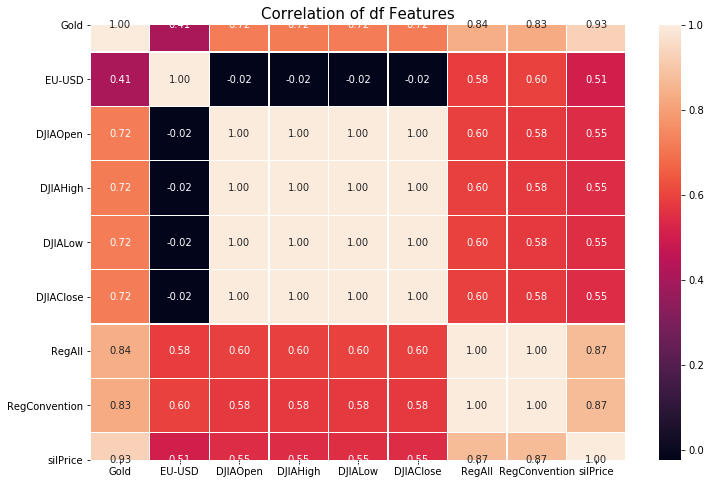

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = scaled_Data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)